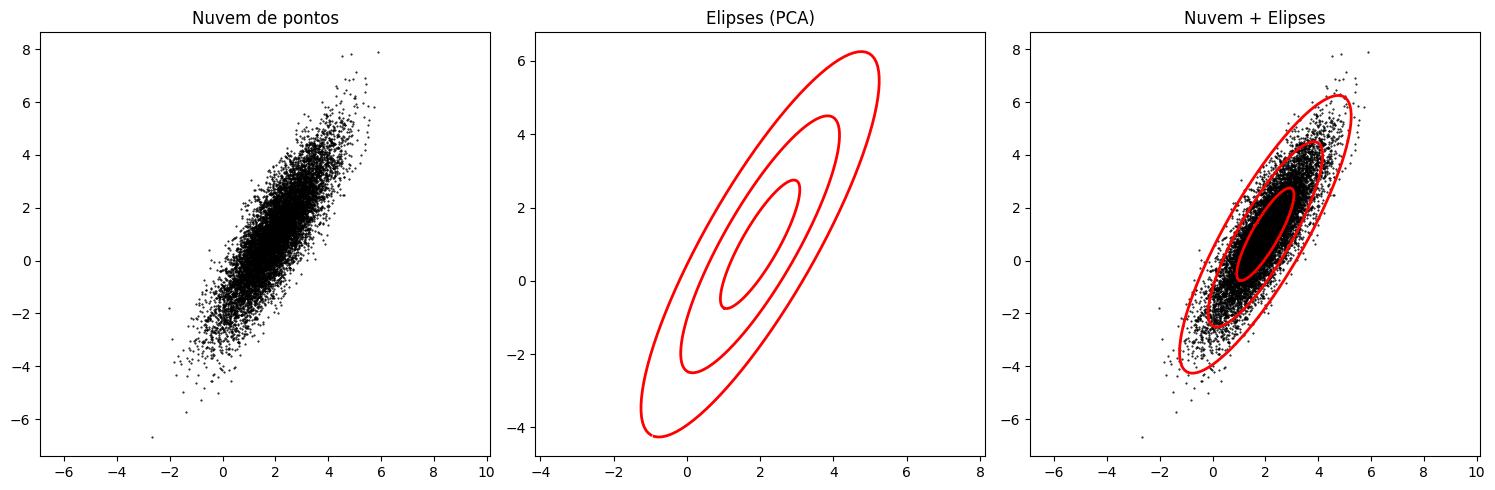

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criar figura com 3 eixos lado a lado
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Dados da nuvem
xC = np.array([2, 1])  # Centro
sig = np.array([2, 0.5])  # Eixos principais
theta = np.pi / 3       # Rotação
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])
nPoints = 10000
X = R @ np.diag(sig) @ np.random.randn(2, nPoints) + np.diag(xC) @ np.ones((2, nPoints))

# Plot nuvem de pontos no ax1
ax1.plot(X[0, :], X[1, :], '.', color='k', markersize=1)
ax1.set_title("Nuvem de pontos")
ax1.axis('equal')

# Média e SVD
Xavg = np.mean(X, axis=1)
B = X - np.tile(Xavg, (nPoints, 1)).T
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# Pontos para as elipses
theta = 2 * np.pi * np.arange(0, 1, 0.01)
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

# Plot só das elipses no ax2
for scale in [1, 2, 3]:
    ax2.plot(Xavg[0] + scale * Xstd[0, :], Xavg[1] + scale * Xstd[1, :],
             '-', color='r', linewidth=2)
ax2.set_title("Elipses (PCA)")
ax2.axis('equal')

# Plot nuvem + elipses no ax3
ax3.plot(X[0, :], X[1, :], '.', color='k', markersize=1)
for scale in [1, 2, 3]:
    ax3.plot(Xavg[0] + scale * Xstd[0, :], Xavg[1] + scale * Xstd[1, :],
             '-', color='r', linewidth=2)
ax3.set_title("Nuvem + Elipses")
ax3.axis('equal')

plt.tight_layout()
plt.show()
